In [1]:
import os
import re
from typing import Dict

import mne
import numpy as np
import scipy.stats as sp_stats
from joblib import Parallel, delayed
from NirsLabProject.config.paths import Paths

from NirsLabProject.utils import general_utils as utils
from NirsLabProject.config.consts import *

from NirsLabProject.utils import general_utils as utils
from NirsLabProject.config.consts import *
from NirsLabProject.config.subject import Subject
from NirsLabProject.utils.group_spikes import group_spikes
from NirsLabProject.utils import plotting


subjects = [Subject(d, True) for d in os.listdir(Paths.products_data_dir_path) if d.startswith('p')]
subjects = filter(lambda subj: subj.stimuli_project, subjects)
subjects = filter(lambda subj: os.path.exists(subj.paths.subject_flat_features_path), subjects)

subject_stats = {
    AMPLITUDE_INDEX: {},
    DURATION_INDEX: {},
    GROUP_FOCAL_INDEX: {},
    GROUP_EVENT_DURATION_INDEX: {},
    GROUP_EVENT_SIZE_INDEX: {},
    GROUP_EVENT_SPATIAL_SPREAD_INDEX: {},
    GROUP_EVENT_DEEPEST_INDEX: {},
    GROUP_EVENT_SHALLOWEST_INDEX: {},
}

feature_id_to_title = {
    AMPLITUDE_INDEX: 'Spike Amplitude Average',
    DURATION_INDEX: 'Spike Width Average',
    GROUP_FOCAL_INDEX: 'Spike Group Focal Amplitude'
    GROUP_EVENT_DURATION_INDEX: 'Spike Group Event Duration Average',
    GROUP_EVENT_SIZE_INDEX: 'Spike Group Event Size Average',
    GROUP_EVENT_SPATIAL_SPREAD_INDEX: 'Spike Group Event Spatial Spread Average',
    GROUP_EVENT_DEEPEST_INDEX: 'Spike Group Event Deepest Electrode Avrage',
    GROUP_EVENT_SHALLOWEST_INDEX: 'Spike Group Event Shallowest Electrode Avrage',
}

for subj in subjects:
    subj_features = np.load(subj.paths.subject_flat_features_path)

    group_ids = subj_features[:, GROUP_INDEX]
    unique_indices = np.unique(group_ids, return_index=True)[1]
    unique_group_subj_features = subj_features[unique_indices]

    if not os.path.exists(subj.paths.subject_sleep_scoring_path):
        continue

    # g for groups - the difference is that we take a representative spike for each group
    g_before, g_stim_block, g_pause_block, g_during_window, g_after = utils.stimuli_effects(subj, unique_group_subj_features)
    before, stim_block, pause_block, during_window, after = utils.stimuli_effects(subj, subj_features)

    for feature_index in subject_stats.keys():
        if GROUP_INDEX <= feature_index <= GROUP_EVENT_SPATIAL_SPREAD_INDEX:
            baseline_mean = np.mean(g_before[:, feature_index])
            stim_block_mean = np.mean(g_stim_block[:, feature_index])
            pause_block_mean = np.mean(g_pause_block[:, feature_index])
            during_window_mean = np.mean(g_during_window[:, feature_index])
            after_mean = np.mean(g_after[:, feature_index])
        else:
            baseline_mean = np.mean(before[:, feature_index])
            stim_block_mean = np.mean(stim_block[:, feature_index])
            pause_block_mean = np.mean(pause_block[:, feature_index])
            during_window_mean = np.mean(during_window[:, feature_index])
            after_mean = np.mean(after[:, feature_index])
        
        baseline_diff = lambda a,b: ((b-a) / max(b, a)) * 100
        if not (np.isnan(baseline_mean) or np.isnan(stim_block_mean) or np.isnan(during_window_mean)):
            subject_stats[feature_index][subj.name] = [
                0,
                baseline_diff(baseline_mean, stim_block_mean),
                baseline_diff(baseline_mean, pause_block_mean),
                baseline_diff(baseline_mean, during_window_mean),
                baseline_diff(baseline_mean,after_mean),
            ]

subject = Subject(STIMULI_PROJECT_INTERSUBJECTS_SUBJECT_NAME, True)
for feature_index, stats in subject_stats.items():
    plotting.plot_stimuli_effects(subject, stats, feature_id_to_title[feature_index], show=True)


SyntaxError: invalid syntax (2018744123.py, line 40)

In [24]:
import os
import re
from typing import Dict

import mne
import numpy as np
import scipy.stats as sp_stats
from joblib import Parallel, delayed
from NirsLabProject.config.paths import Paths

from NirsLabProject.utils import general_utils as utils
from NirsLabProject.config.consts import *

from NirsLabProject.utils import general_utils as utils
from NirsLabProject.config.consts import *
from NirsLabProject.config.subject import Subject
from NirsLabProject.utils.group_spikes import group_spikes
from NirsLabProject.utils import plotting


subjects = [Subject(d, True) for d in os.listdir(Paths.products_data_dir_path) if d.startswith('p')]
subjects = filter(lambda subj: subj.stimuli_project, subjects)
subjects = filter(lambda subj: os.path.exists(subj.paths.subject_flat_features_path), subjects)

subject_stats = {
    AMPLITUDE_INDEX: {},
    DURATION_INDEX: {},
    GROUP_EVENT_DURATION_INDEX: {},
    GROUP_EVENT_SIZE_INDEX: {},
    GROUP_EVENT_SPATIAL_SPREAD_INDEX: {},
    GROUP_EVENT_DEEPEST_INDEX: {},
    GROUP_EVENT_SHALLOWEST_INDEX: {},
}

feature_id_to_title = {
    AMPLITUDE_INDEX: 'Spike Amplitude Average',
    DURATION_INDEX: 'Spike Width Average',
    GROUP_EVENT_DURATION_INDEX: 'Spike Group Event Duration Average',
    GROUP_EVENT_SIZE_INDEX: 'Spike Group Event Size Average',
    GROUP_EVENT_SPATIAL_SPREAD_INDEX: 'Spike Group Event Spatial Spread Average',
    GROUP_EVENT_DEEPEST_INDEX: 'Spike Group Event Deepest Electrode Avrage',
    GROUP_EVENT_SHALLOWEST_INDEX: 'Spike Group Event Shallowest Electrode Avrage',
}

for subj in subjects:
    subj_features = np.load(subj.paths.subject_flat_features_path)

    group_ids = subj_features[:, GROUP_INDEX]
    unique_indices = np.unique(group_ids, return_index=True)[1]
    unique_group_subj_features = subj_features[unique_indices]

    if not os.path.exists(subj.paths.subject_sleep_scoring_path):
        continue

    # g for groups - the difference is that we take a representative spike for each group
    g_before, g_stim_block, g_pause_block, g_during_window, g_after = utils.stimuli_effects(subj, unique_group_subj_features)
    before, stim_block, pause_block, during_window, after = utils.stimuli_effects(subj, subj_features)

    for feature_index in subject_stats.keys():
        if GROUP_INDEX <= feature_index <= GROUP_EVENT_SPATIAL_SPREAD_INDEX:
            baseline_mean = np.mean(g_before[:, feature_index])
            stim_block_mean = np.mean(g_stim_block[:, feature_index])
            pause_block_mean = np.mean(g_pause_block[:, feature_index])
            during_window_mean = np.mean(g_during_window[:, feature_index])
            after_mean = np.mean(g_after[:, feature_index])
        else:
            baseline_mean = np.mean(before[:, feature_index])
            stim_block_mean = np.mean(stim_block[:, feature_index])
            pause_block_mean = np.mean(pause_block[:, feature_index])
            during_window_mean = np.mean(during_window[:, feature_index])
            after_mean = np.mean(after[:, feature_index])
        
        baseline_diff = lambda a,b: ((b-a) / max(b, a)) * 100
        if not (np.isnan(baseline_mean) or np.isnan(stim_block_mean) or np.isnan(during_window_mean)):
            if not subject_stats[feature_index].get('baseline'):
                subject_stats[feature_index]['baseline'] = []
            if not subject_stats[feature_index].get('stim block'):
                subject_stats[feature_index]['stim block'] = []
            if not subject_stats[feature_index].get('pause block'):
                subject_stats[feature_index]['pause block'] = []
            if not subject_stats[feature_index].get('after block'):
                subject_stats[feature_index]['after block'] = []
            
            subject_stats[feature_index]['baseline'].append(0)
            subject_stats[feature_index]['stim block'].append(baseline_diff(baseline_mean, stim_block_mean))
            subject_stats[feature_index]['pause block'].append(baseline_diff(baseline_mean, pause_block_mean))
            subject_stats[feature_index]['after block'].append(baseline_diff(baseline_mean, after_mean))
            


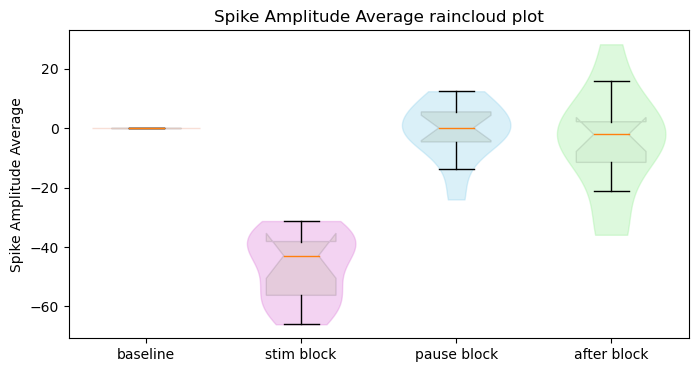

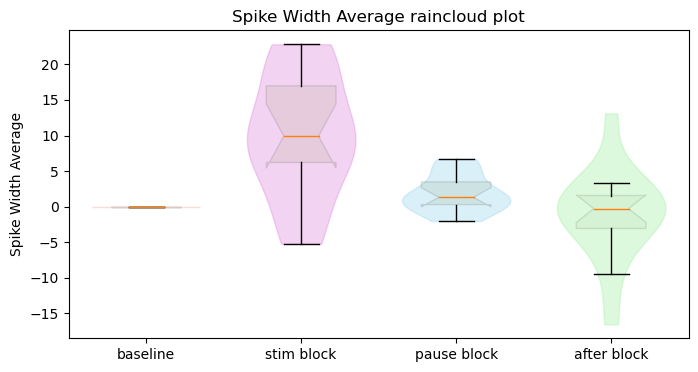

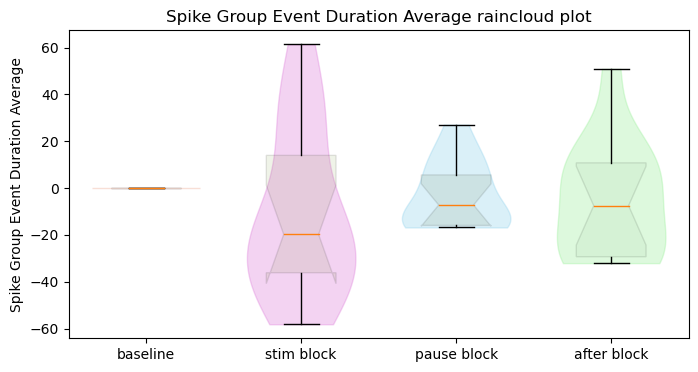

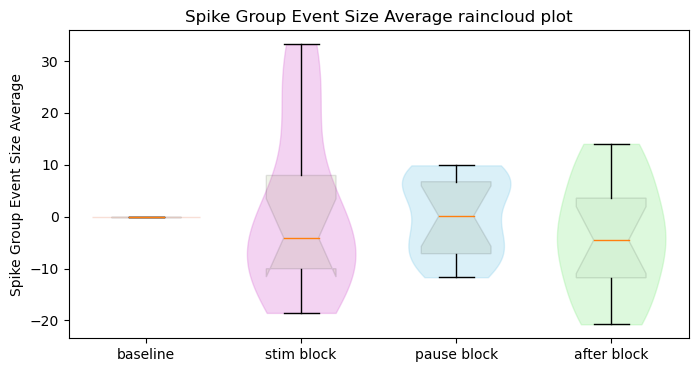

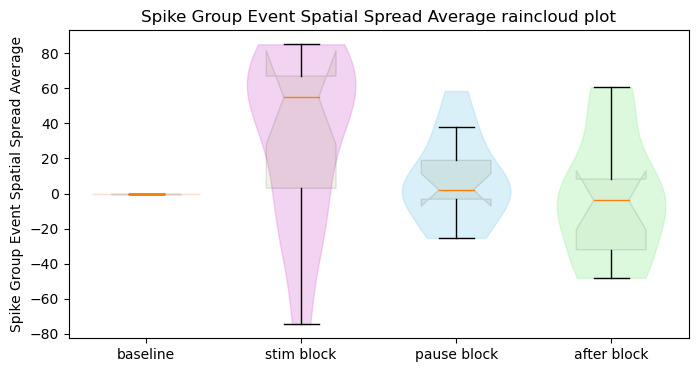

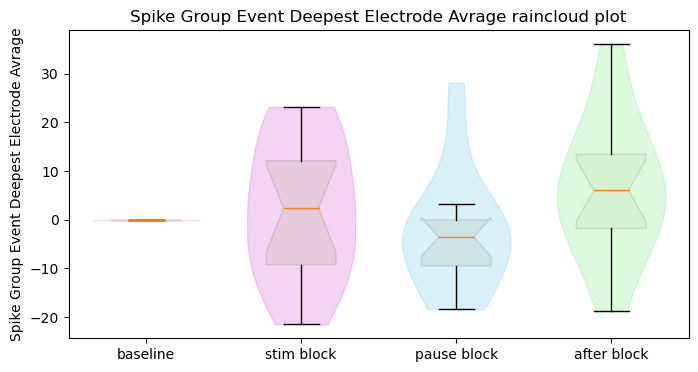

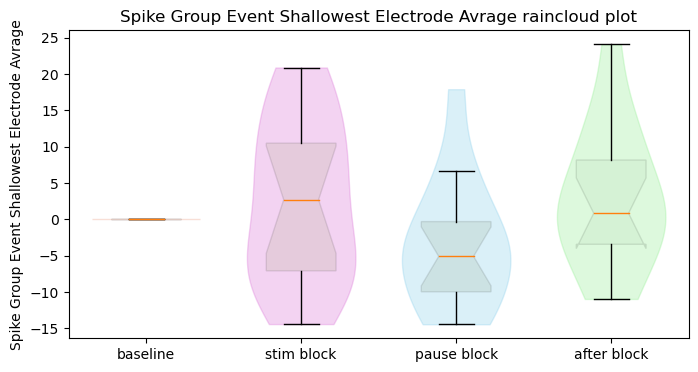

In [26]:

subject_stats

subject = Subject(STIMULI_PROJECT_INTERSUBJECTS_SUBJECT_NAME, True)
path = os.path.join(subject.paths.subject_stimuli_effects_plots_dir_path)

for feature_index, stats in subject_stats.items():
    plotting.create_raincloud_plot(
            figure_path=path,
            data_channels=subject_stats[feature_index],
            feature_name=feature_id_to_title[feature_index],
            resample=False,
            description= "",
            show=True
        )